# **깊이 우선 탐색 DFS(Depth First Search)**
 - <span style="color:red">**최대한 깊이**</span> 내려간 뒤 더 이상 내려갈 곳이 없으면 옆으로 이동하는 방식
 - 동작 과정
   1. 탐색 시작 노드를 <span style="color:red">**스택에 삽입하고 방문 처리**</span> (이미 방문(탐색)했던 노드를 재방문 하지 않기 위해)
   2. 스택의 최상단 노드에 <span style="color:red">**방문하지 않은 인접 노드가 있다면**</span> 그 노드를 스택에 넣고 방문 처리. 만약 <span style="color:red">**방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냄**</span>
   3. 2번의 과정을 더 이상 수행할 수 없을 때까지 반복.
   4. 이때 재귀 함수로 구현하면 굳이 스택을 사용할 필요가 없다.
 - 장점
   1. 현 경로상의 노드들만 기억하기 때문에 <span style="color:red">**적은 메모리**</span>를 사용.(공간 복잡도)
   2. 목표 노드가 <span style="color:red">**깊은 단계에 있는 경우 BFS보다 빠르게**</span> 탐색 가능
 - 단점
   1. 해가 없는 경로를 탐색할 경우 <span style="color:red">**단계가 끝날 때까지 (현 경로의 가장 끝까지) 탐색함.**</span>
   2. 목표에 이르는 경로가 다수인 경우, DFS는 해에 도착하면 탐색을 종료하기에 <span style="color:red">**얻어진 해가 최단 경로라는 보장이 없음.**</span>

   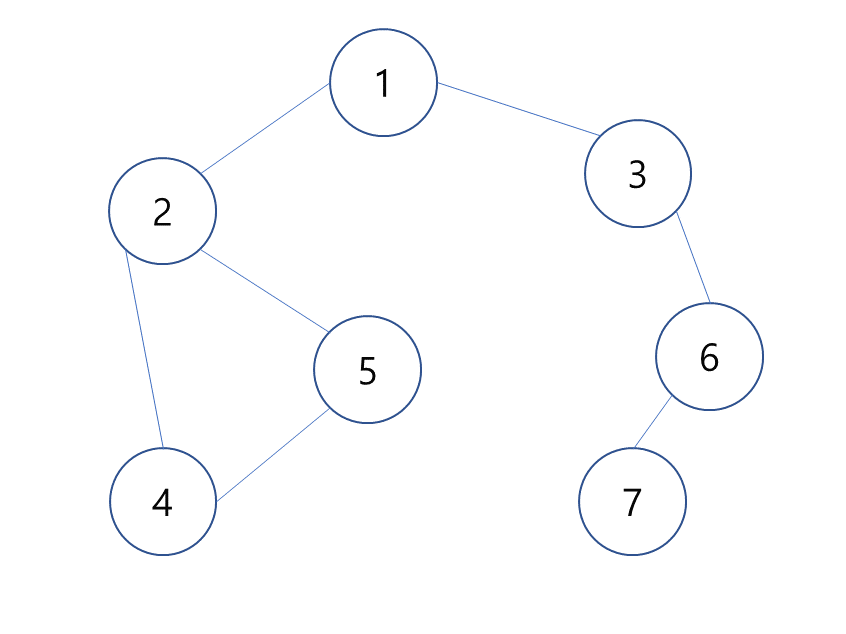
   
   https://veggie-garden.tistory.com/42

In [ ]:
graph = [
    [],     # 0
    [2, 3], # 1
    [4, 5], # 2
    [6],    # 3
    [2, 5], # 4
    [2, 4], # 5
    [3, 7], # 6
    [6]     # 7
]

# 방문 정보를 기록하기 위한 리스트
visited = [False] * 8

def dfs(v):
    # 방문 표시
    visited[v] = True
    print(v, end=' ')
    # 그래프를 순환하면서 인접 노드들을 방문
    for i in graph[v]:
        # 만약 방문하지 않은 노드가 있다면
        if not visited[i]:
            # 탐색 시작
            dfs(i)
# 탐색 시작 노드 1을 넣어주며 dfs() 실행행
dfs(1) # 1 2 4 5 3 6 7

# **너비 우선 탐색 BFS(Breadth First Search)**
 - 인접 노드를 계속 큐에 넣어가며 큐에 들어온 순서대로 탐색을 시작하기에 <span style="color:red">**시작 노드에서부터 가까운 노드**</span>들부터 탐색
 - 동작 과정
   1. 탐색 시작 노드를 <span style="color:red">**큐에 삽입하고 방문 처리**</span>
   2. 큐에서 노드를 꺼내 해당 노드의 <span style="color:red">**방문하지 않은 모든 인접 노드를 모두 큐에 삽입하고 방문 처리.**</span>
   3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복.
 - 장점
   1. 모든 경로를 탐색하기에 여러 해가 있을 경우에도 <span style="color:red">**최단 경로임을 보장**</span>함.
   2. 최단 경로가 존재하면 <span style="color:red">**깊이가 무한정 깊어진다고 해도 답을 찾을 수 있음.**</span>
   3. <span style="color:red">**노드의 수가 적고, 깊이가 얕은 해가 존재**</span>할 때 유리함.
 - 단점
   1. 노드의 수가 많을수록 탐색 가지가 급격히 증가함에 따라 보다 <span style="color:red">**많은 기억 공간(메모리)을 필요**</span>로 하게 됨.

In [ ]:
from collections import deque

graph = [
    [],     # 0
    [2, 3], # 1
    [4, 5], # 2
    [6],    # 3
    [2, 5], # 4
    [2, 4], # 5
    [3, 7], # 6
    [6]     # 7
]

visited = [False] * 8

def bfs(v):
    # 큐 생성 및 큐에 시작 노드 삽입
    q = deque()
    q.append(v)
    # 아직 방문해야 하는 노드가 있다면
    while q:
        # 큐에서 노드를 꺼내서 x에 저장
        x = q.popleft()
        print(x, end=' ')
        # 그래프를 탐색하다가 방문하지 않은 노드가 있다면
        for i in graph[x]:
            if not visited[i]:
                # 큐에 방문하라고 삽입하고 방문 처리
                q.append(i)
                visited[i] = True

bfs(1) # 1 2 3 4 5 6 7

# **DFS, BFS 차이 비교**

|DFS|BFS|
|---|---|
|스택 또는 재귀 함수|큐|
|최적 해라는 보장 없음|항상 최적 해임을 보장|
|그래프 규모가 클 때|그래프 규모가 작을 때|
|특정 목표 노드를 찾을 때|최단 경로를 찾을 때|

 # <span style="font-weight:bold">백 트래킹(Back Tracking)</style>
  - <span style="font-weight:bold;color:red">가능한 모든 경우의 수</span>를 체계적으로 탐색하여 문제를 해결하는 알고리즘
  - 주어진 문제의 해를 찾기 위해 <span style="font-weight:bold;color:red">후보 해</span>를 하나씩 만들어가며, 해당 후보가 조건에 맞지 않으면 <span style="font-weight:bold;color:red">이전 단계로 돌아가 다른 후보</span>를 시도하는 방식

 #### <span style="font-weight:bold">원리</style>
 1. 초기화 - 문제를 해결하기 위한 <span style="font-weight:bold;color:red">초기 상태 설정
 2. 조건 확인 - 현재 후보가 <span style="font-weight:bold;color:red">문제의 조건을 만족</span>하는지 확인
 3. 후보 생성 - 다음 후보를 생성하여 <span style="font-weight:bold;color:red">재귀적</span>으로 문제를 해결한다.
 4. 가지치기(Pruning) - <span style="font-weight:bold;color:red">조건을 만족하지 않는 후보를 제거</span>하여 탐색 공간을 줄인다.
 5. 결과 반환 - 모든 후보를 탐색하여 최종 해를 반환한다.

 #### <span style="font-weight:bold">특징</span>
  - 완전 탐색 - <span style="font-weight:bold;color:red">가능한 모든 경우의 수</span>를 탐색하므로 해를 반드시 찾을 수 있음.
  - 재귀적 접근 - <span style="font-weight:bold;color:red">재귀 호출</span>을 통해 문제를 해결하는 경우가 많음.
  - 효율성 - <span style="font-weight:bold;color:red">가지치기를 통해 불필요한 탐색을 줄여</span> 효율적으로 문제를 해결

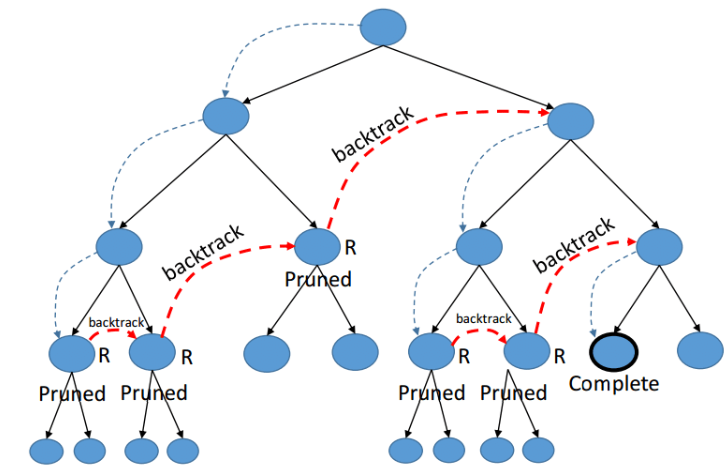

15649번 N과 M (1) <span style="color:green">성공</span> - 2025.03.15

In [ ]:
def dfs(depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(n):
        if not visited[i]:
            visited[i] = True
            ans.append(num[i])
            dfs(depth + 1)
            ans.pop()
            visited[i] = False

n, m = map(int, input().split())
num = [i for i in range(1, n + 1)]
visited = [False for _ in range(n)]
ans = []

dfs(0)

15650번 N과 M (2) <span style="color:green">성공</span> - 2025.03.15

In [ ]:
def dfs(start, depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(start, n):
        ans.append(num[i])
        dfs(i + 1, depth + 1)
        ans.pop()

n, m = map(int, input().split())
num = [i for i in range(1, n + 1)]
ans = []

dfs(0, 0)

15651번 N과 M (3) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(n):
        ans.append(num[i])
        dfs(depth + 1)
        ans.pop()

n, m = map(int, input().split())
num = [i for i in range(1, n + 1)]
ans = []

dfs(0)

15652번 N과 M (4) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(start, depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(start, n):
        ans.append(num[i])
        dfs(i, depth + 1)
        ans.pop()

n, m = map(int, input().split())
num = [i for i in range(1, n + 1)]
ans = []

dfs(0, 0)

15654번 N과 M (5) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(n):
        if num[i] not in ans:
            ans.append(num[i])
            dfs(depth + 1)
            ans.pop()

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
ans = []

dfs(0)

15655번 N과 M (6) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(start, depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(start, n):
        ans.append(num[i])
        dfs(i + 1, depth + 1)
        ans.pop()

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
ans = []

dfs(0, 0)

15656번 N과 M (7) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(n):
        ans.append(num[i])
        dfs(depth + 1)
        ans.pop()

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
ans = []

dfs(0)

15657번 N과 M (8) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(start, depth):
    if depth == m:
        print(*ans)
        return
    
    for i in range(start, n):
        ans.append(num[i])
        dfs(i, depth + 1)
        ans.pop()

n, m = map(int, input().split())
num = list(map(int ,input().split()))
num.sort()
ans = []

dfs(0, 0)

15663번 N과 M (9) <span style="color:red">실패</span> - 2025.03.16 *

In [ ]:
def dfs(depth):
    prev_num = 0

    if depth == m:
        print(*ans)
        return
    
    for i in range(n):
        if prev_num != num[i] and not visited[i]:
            visited[i] = True
            ans.append(num[i])
            prev_num = num[i]
            dfs(depth + 1)
            ans.pop()
            visited[i] = False

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
visited = [False for _ in range(n)]
ans = []

dfs(0)

15664번 N과 M (10) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(start, depth):
    prev_num = 0

    if depth == m:
        print(*ans)
        return
    
    for i in range(start, n):
        if prev_num != num[i]:
            ans.append(num[i])
            prev_num = num[i]
            dfs(i + 1, depth + 1)
            ans.pop()

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
ans=[]

dfs(0, 0)

15665번 N과 M (11) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(depth):
    prev_num = 0

    if depth == m:
        print(*ans)
        return
    
    for i in range(n):
        if prev_num != num[i]:
            ans.append(num[i])
            prev_num = num[i]
            dfs(depth + 1)
            ans.pop()

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
ans = []

dfs(0)

15666번 N과 M (12) <span style="color:green">성공</span> - 2025.03.16

In [ ]:
def dfs(start, depth):
    prev_num = 0

    if depth == m:
        print(*ans)
        return
    
    for i in range(start, n):
        if prev_num != num[i]:
            ans.append(num[i])
            prev_num = num[i]
            dfs(i, depth + 1)
            ans.pop()

n, m = map(int, input().split())
num = list(map(int, input().split()))
num.sort()
ans = []

dfs(0, 0)